In [2]:
import matplotlib.patches as patches
from matplotlib.path import Path
import re
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define a range of alpha and beta parameters
alpha_vals = np.linspace(0.5, 5, 100)
beta_vals = np.linspace(0.5, 5, 100)

# Create a meshgrid of alpha and beta values
A, B = np.meshgrid(alpha_vals, beta_vals)

# Compute the entropy for each (alpha, beta) pair
# The result is in nats
entropy_vals = beta.entropy(A, B)

# # Plot the entropy as a contour plot
# plt.figure(figsize=(10, 6))
# contour = plt.contourf(A, B, entropy_vals, levels=50, cmap='viridis')
# plt.colorbar(contour, label='Entropy (nats)')
# plt.xlabel('Alpha (α)')
# plt.ylabel('Beta (β)')
# plt.title('Entropy of Beta Distribution as a Function of α and β')
# plt.tight_layout()
# plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Range of standard deviation values
std_devs = np.linspace(0.01, 5, 500)
variances = std_devs**2

# Differential entropy formula for Gaussian distribution:
# H(X) = 0.5 * log(2 * pi * e * σ^2)
entropy_nats = 0.5 * np.log(2 * np.pi * np.e * variances)

# # Plot entropy vs standard deviation
# plt.figure(figsize=(10, 6))
# plt.plot(std_devs, entropy_nats, label='Entropy (nats)', color='royalblue')
# plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
# plt.xlabel('Standard Deviation (σ)')
# plt.ylabel('Differential Entropy (nats)')
# plt.title('Differential Entropy of Normal Distribution vs Standard Deviation')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


/tmp/ipykernel_130096/1511560503.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("entropy.pdf", dpi=300, bbox_inches = "tight")
/home/y/git/acn-experiments/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/y/git/acn-experiments/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


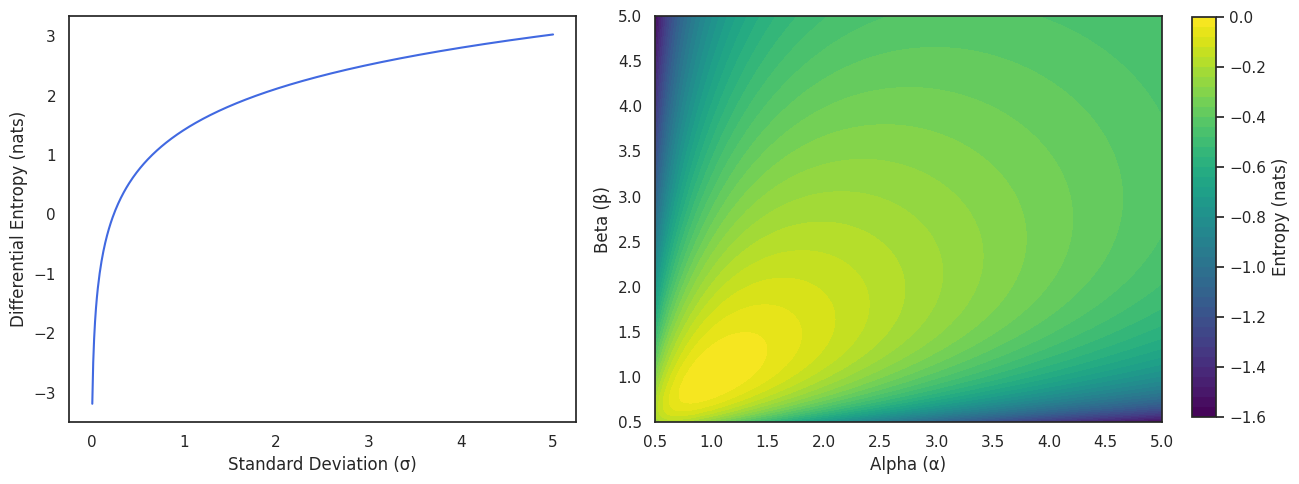

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].plot(std_devs, entropy_nats, label='Entropy (nats)', color='royalblue')
axs[0].set_xlabel('Standard Deviation (σ)')
axs[0].set_ylabel('Differential Entropy (nats)')

contour = axs[1].contourf(A, B, entropy_vals, levels=50, cmap='viridis')
axs[1].set_xlabel('Alpha (α)')
axs[1].set_ylabel('Beta (β)')
# plt.colorbar(contour, label='Entropy (nats)')

# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.15, 0.02, 0.8])
fig.colorbar(contour, label='Entropy (nats)', cax=cbar_ax)
pass
fig.savefig("entropy.pdf", dpi=300, bbox_inches = "tight")

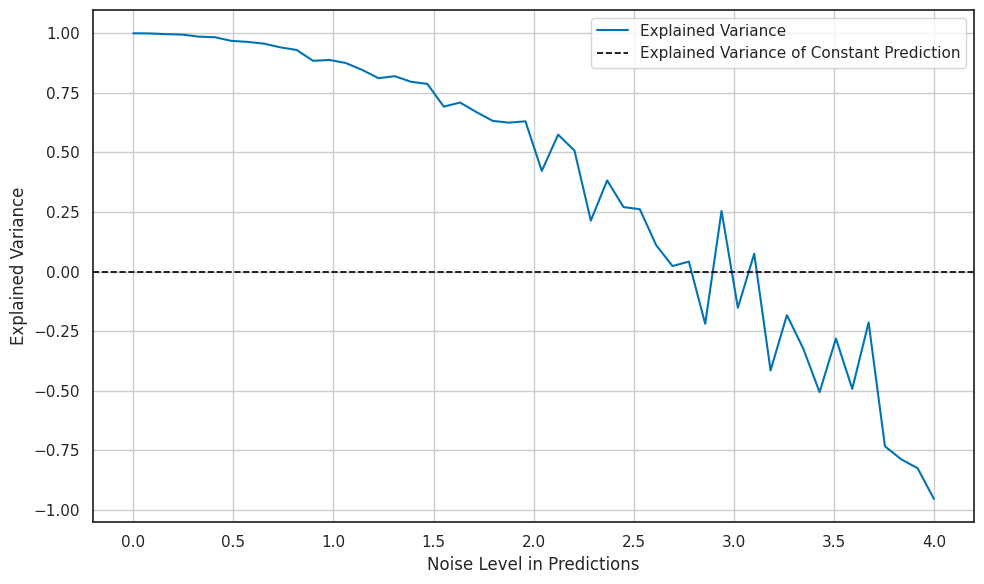

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate true values (e.g., a linear function)
n = 100
y_true = np.linspace(0, 10, n)

# Simulate different levels of prediction noise
noise_levels = np.linspace(0, 4, 50)
explained_variances = []
total_vars = []
total_vars_pred = []
residual_vars = []

for noise_scale in noise_levels:
    # Add noise to simulate predictions
    y_pred = y_true + np.random.normal(0, noise_scale, size=n)
    
    # Calculate total and residual variance
    residual_var = np.var(y_true - y_pred)
    total_var = np.var(y_true)
    total_var_pred = np.var(y_pred)
    residual_vars.append(residual_var)
    
    total_vars.append(total_var)
    total_vars_pred.append(total_var_pred)
    
    # Compute explained variance
    explained_var = 1 - residual_var / total_var
    explained_variances.append(explained_var)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(noise_levels, explained_variances, label='Explained Variance')
# ax.plot(noise_levels, total_vars, label='Variance')
# ax.plot(noise_levels, total_vars_pred, label='Variance pred')
# ax.plot(noise_levels, residual_vars, label='Residual Vars')
yyy = 1 - np.var(y_true - np.mean(y_true)) / np.var(y_true)
ax.axhline(yyy, color='black', linestyle='--', linewidth=1.2, label="Explained Variance of Constant Prediction")


# ax.axhline(-1, color='gray', linestyle='--', linewidth=0.8)
# ax.axhline(1, color='gray', linestyle='--', linewidth=0.8)
ax.set_xlabel('Noise Level in Predictions')
ax.set_ylabel('Explained Variance')
# ax.set_title('Explained Variance vs Prediction Noise')
ax.grid(True)
ax.legend()

fig.tight_layout()
# plt.show()
fig.savefig("explained_var.pdf", dpi=300, bbox_inches = "tight")